In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy.interpolate import interp1d
from scipy import stats
import constants

In [67]:
df = pd.read_csv("data.csv", index_col=0)
df

,4/27,5/1,5/8,5/15,5/23,5/30,6/7,6/12,6/19,7/3,7/10,7/17,8/2,8/7,8/14,8/20,8/28,9/4,9/11
NJNY,0.55,0.68,0.50,0.52,0.38,0.50,0.61,0.51,0.33,0.22,0.32,0.19,0.11,0.06,0.02,0.01,0.00,0.00,0.00
POR,0.70,0.79,0.79,0.77,0.61,0.63,0.73,0.88,0.94,0.94,0.94,0.98,0.99,0.99,0.99,0.99,0.97,0.97,0.99
LA,0.17,0.26,0.17,0.29,0.37,0.27,0.17,0.29,0.24,0.27,0.39,0.39,0.33,0.26,0.41,0.41,0.46,0.45,0.41
CHI,0.66,0.72,0.72,0.63,0.74,0.72,0.82,0.86,0.85,0.94,0.94,0.88,0.81,0.87,0.77,0.60,0.69,0.67,0.67
WAS,0.80,0.85,0.84,0.74,0.75,0.72,0.59,0.47,0.37,0.28,0.14,0.07,0.05,0.03,0.02,0.01,0.00,0.00,0.00
SD,0.28,0.37,0.57,0.69,0.75,0.71,0.71,0.72,0.88,0.95,0.92,0.88,0.96,0.92,0.80,0.90,0.97,0.97,0.92
NC,0.71,0.61,0.66,0.66,0.38,0.37,0.51,0.67,0.53,0.44,0.43,0.40,0.39,0.40,0.21,0.33,0.24,0.31,0.41
RGN,0.81,0.75,0.69,0.70,0.66,0.79,0.71,0.71,0.78,0.89,0.89,0.82,0.90,0.80,0.88,0.85,0.88,0.87,0.82
LOU,0.34,0.28,0.31,0.28,0.49,0.40,0.26,0.15,0.17,0.14,0.07,0.06,0.03,0.01,0.01,0.01,0.04,0.00,0.00
HOU,0.37,0.27,0.39,0.39,0.57,0.56,0.69,0.53,0.74,0.63,0.48,0.70,0.86,0.95,0.93,0.93,0.85,0.83,0.80


In [68]:
# Current standings with the top team first
standings = [
    "KC",
    "POR",
    "SD",
    "HOU",
    "RGN",
    "CHI",
    "LA",
    "NC",
    "ORL",
    "WAS",
    "LOU",
    "NJNY",
]

# List of teams who clinched
clinched = []

# List of teams eliminated
eliminated = ["NJNY", "LOU"]

In [69]:
# Sort first by odds and then use standings to break ties
sort_by = [df.columns[-1], "standing"]
df["standing"] = list(map(lambda x: len(df.index) - standings.index(x), df.index))
df = df.sort_values(by=sort_by)
df = df.drop(columns=["standing"])
df

,4/27,5/1,5/8,5/15,5/23,5/30,6/7,6/12,6/19,7/3,7/10,7/17,8/2,8/7,8/14,8/20,8/28,9/4,9/11
NJNY,0.55,0.68,0.50,0.52,0.38,0.50,0.61,0.51,0.33,0.22,0.32,0.19,0.11,0.06,0.02,0.01,0.00,0.00,0.00
LOU,0.34,0.28,0.31,0.28,0.49,0.40,0.26,0.15,0.17,0.14,0.07,0.06,0.03,0.01,0.01,0.01,0.04,0.00,0.00
WAS,0.80,0.85,0.84,0.74,0.75,0.72,0.59,0.47,0.37,0.28,0.14,0.07,0.05,0.03,0.02,0.01,0.00,0.00,0.00
ORL,0.25,0.15,0.21,0.18,0.21,0.23,0.12,0.08,0.04,0.05,0.07,0.06,0.06,0.03,0.09,0.14,0.00,0.03,0.00
NC,0.71,0.61,0.66,0.66,0.38,0.37,0.51,0.67,0.53,0.44,0.43,0.40,0.39,0.40,0.21,0.33,0.24,0.31,0.41
LA,0.17,0.26,0.17,0.29,0.37,0.27,0.17,0.29,0.24,0.27,0.39,0.39,0.33,0.26,0.41,0.41,0.46,0.45,0.41
CHI,0.66,0.72,0.72,0.63,0.74,0.72,0.82,0.86,0.85,0.94,0.94,0.88,0.81,0.87,0.77,0.60,0.69,0.67,0.67
HOU,0.37,0.27,0.39,0.39,0.57,0.56,0.69,0.53,0.74,0.63,0.48,0.70,0.86,0.95,0.93,0.93,0.85,0.83,0.80
RGN,0.81,0.75,0.69,0.70,0.66,0.79,0.71,0.71,0.78,0.89,0.89,0.82,0.90,0.80,0.88,0.85,0.88,0.87,0.82
SD,0.28,0.37,0.57,0.69,0.75,0.71,0.71,0.72,0.88,0.95,0.92,0.88,0.96,0.92,0.80,0.90,0.97,0.97,0.92


In [70]:
x = list(range(0, len(df.columns)))
y = df.to_numpy()

In [71]:
# Create grid for x and bottom values for y
x2 = np.linspace(min(x), max(x), num=500)
y2 = [[0 for i in x2]]

# Sum the previous rows before calculating the spline
run_tot = [0 for i in x]

# Interpolate each set of points
for row in y[:-1]:
    run_tot = run_tot + row
    f = interp1d(x, run_tot, kind="quadratic")
    y2.append(f(x2))

# Last row has to be exactly 6
y2.append([6 for i in x2])

# Diff pairwise rows to get the final y
y2 = np.diff(y2, axis=0)

<Figure size 28800x16200 with 0 Axes>

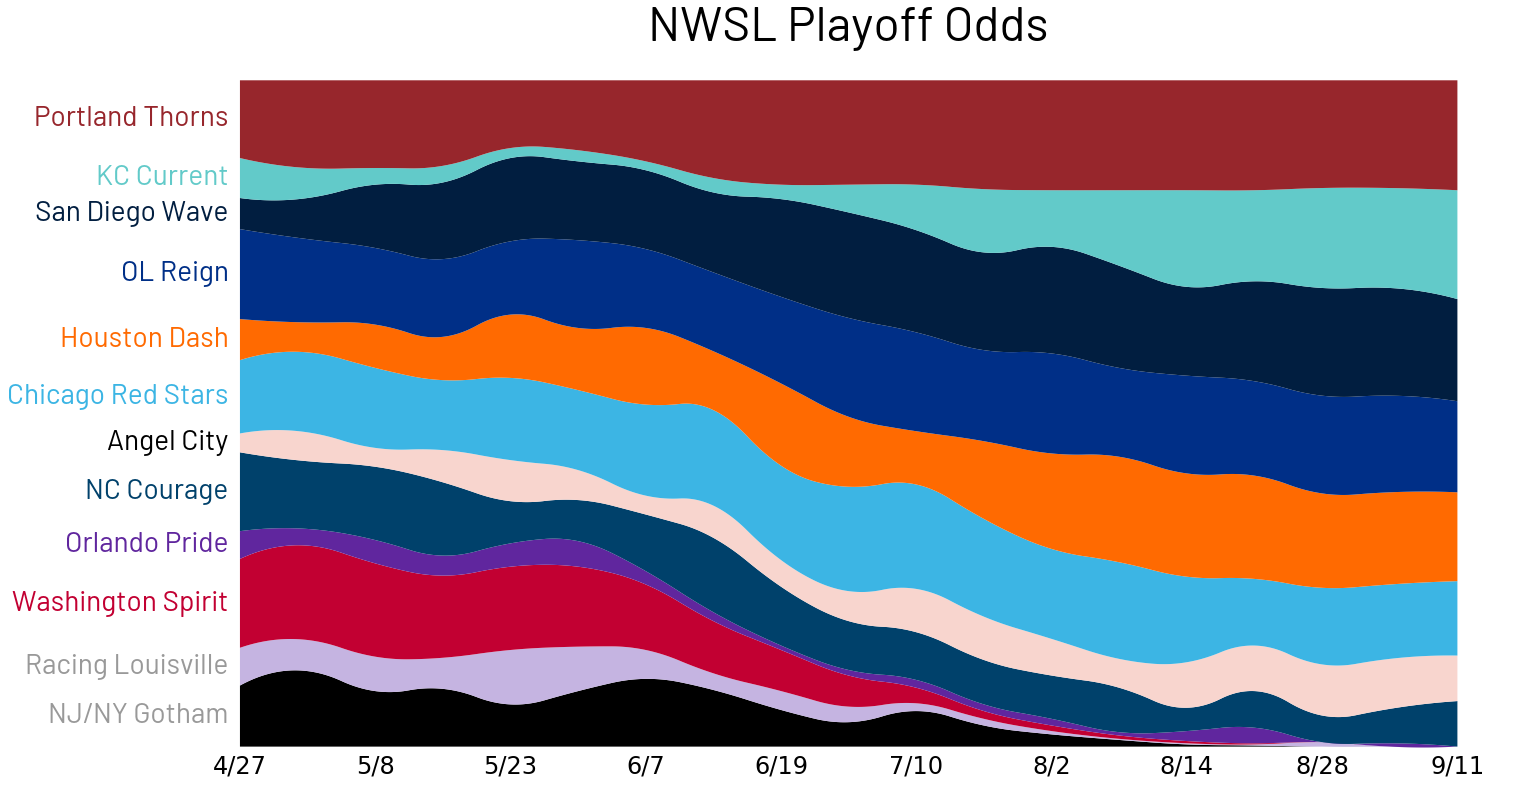

In [72]:
barlow = fm.FontProperties(fname="/home/agale/nwsl-analytics/nwsl-rank/Barlow.otf")
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()

# Plot data
plt.stackplot(
    x2,
    y2,
    labels=df.index,
    colors=[constants.colors[i] for i in df.index],
    baseline="zero",
)

# Plot team labels
pos = 0
for team in df.index:
    pos += df.at[team, str(df.columns[0])]
    ax.text(
        0,
        pos - 0.5 * df.at[team, str(df.columns[0])],
        constants.teams[team] + ("*" if team in clinched else "") + "  ",
        color="black" if team in ["LA", "LOU"] else constants.colors[team],
        alpha=0.4 if team in eliminated else 1,
        fontsize=28,
        fontproperties=barlow,
        fontweight="bold",
        va="center",
        ha="right",
    )

# Add the clinched label
if len(clinched) > 0:
    ax.text(
        -0.5,
        -0.35,
        "* Playoff clinched",
        color="black",
        fontsize=20,
        fontproperties=barlow,
        fontweight="bold",
        va="center",
        ha="right",
    )

# Title
plt.title("NWSL Playoff Odds", fontproperties=barlow, size=48)

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])

# X ticks
def format_fn(tick_val, tick_pos):
    if int(tick_val) >= 0 and int(tick_val) < len(df.columns):
        return df.columns[int(tick_val)]
    else:
        return ''
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis="x", which="major", labelsize=24, pad=-30)

# Save image
plt.savefig("playoff_odds.png", bbox_inches="tight")